<a href="https://colab.research.google.com/github/Vishnuprasad-23/HTF22-Team-82/blob/main/supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('sample.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price')

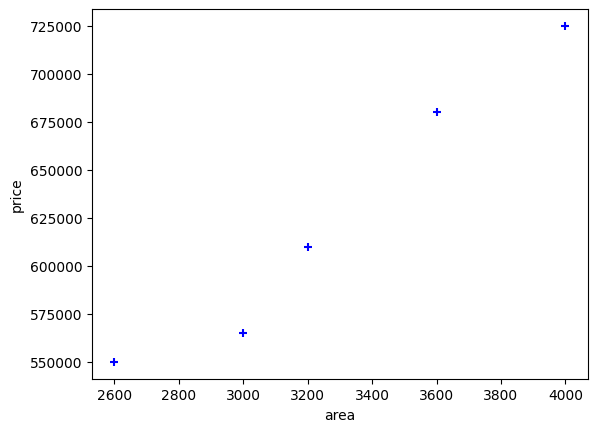

In [3]:
plt.scatter(df.area, df.price, color='blue', marker='+')
plt.xlabel('area')
plt.ylabel('price')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [6]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [8]:
reg.coef_
reg.intercept_

180616.43835616432

#Multiple linear regression / Multivariate regression

In [10]:
df = pd.read_csv("sample.csv")
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000


In [14]:
import math
median_bedrooms = math.floor(df.bedroom.median())
median_bedrooms

3

In [20]:
df.bedroom = df.bedroom.fillna(median_bedrooms)
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000


In [22]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedroom', 'age']], df.price)

LinearRegression()

In [23]:
reg.coef_

array([  143.625, -6762.5  ,   337.5  ])

In [24]:
reg.intercept_

173112.5

In [25]:
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([597200.])

#one-hot encoding

In [1]:
import pandas as pd
df = pd.read_csv("sample.csv")
df

,town,area,p
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [6]:
dummies = pd.get_dummies(df.town)

In [7]:
merged = pd.concat([df, dummies], axis='columns')
merged

,town,area,p,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [8]:
final = merged.drop(['town', 'west windsor'], axis='columns')
final

,area,p,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
X = final.drop('p', axis = 'columns')
X

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [12]:
y = final.p
y

,p
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [13]:
model.fit(X,y)

LinearRegression()

In [15]:
model.predict([[2800,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [16]:
model.predict([[3400,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [17]:
model.score(X,y)

0.9573929037221872

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [20]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,p
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [22]:
X = dfle[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [23]:
y = dfle.p
y

,p
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'town' is the categorical feature at index 0
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), [0])],
    remainder='passthrough'
)

X_encoded = transformer.fit_transform(X)
X_encoded

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [32]:
X_encoded = X_encoded[:,1:]
X_encoded

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [33]:
model.fit(X_encoded, y)

LinearRegression()

In [34]:
model.predict([[1,0,2800]])

array([590775.63964739])

#logistic regression

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv('sample.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


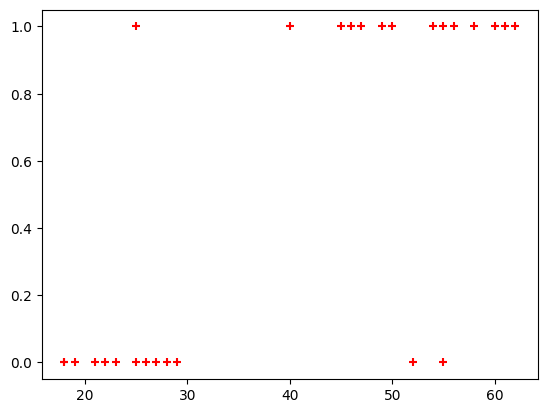

In [38]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

In [40]:
df.shape

(27, 2)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size = 0.9)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
X_test

,age
12,27
14,49
16,25


In [47]:
model.predict(X_test)

array([0, 1, 0])

In [51]:
model.score(X_test, y_test)

0.6666666666666666

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


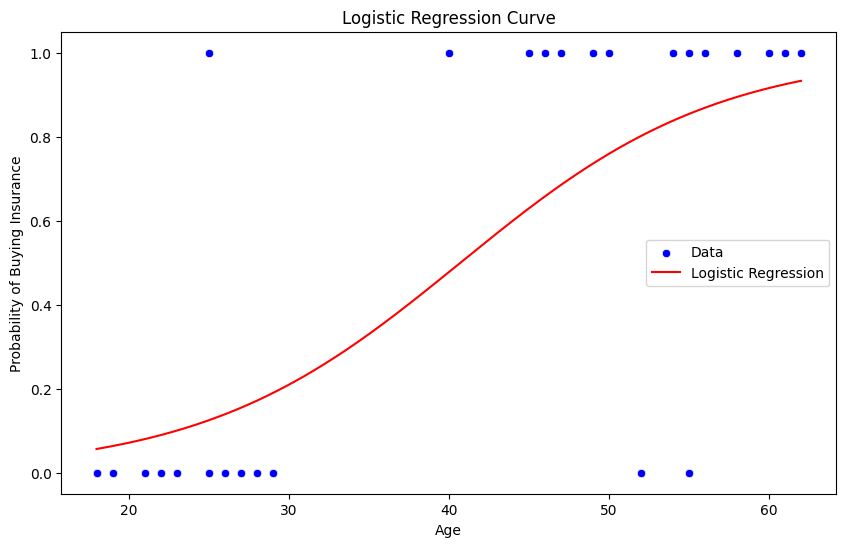

In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a sample dataset
np.random.seed(0)
age = np.random.randint(18, 60, size=100)
bought_insurance = np.random.binomial(1, p=1/(1 + np.exp(-0.1*(age-40))), size=100)

#df = pd.DataFrame({'age': age, 'bought_insurance': bought_insurance})
df = pd.read_csv('sample.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.9, random_state=0)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Generate predictions for a range of ages
X_range = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]

# Plot the data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bought_insurance', data=df, label='Data', color='blue')

# Plot the logistic regression curve
plt.plot(X_range, y_prob, color='red', label='Logistic Regression')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Logistic Regression Curve')
plt.legend()
plt.show()


#Multi class classification

In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [60]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [62]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

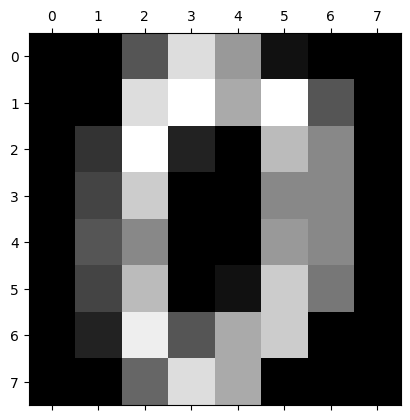

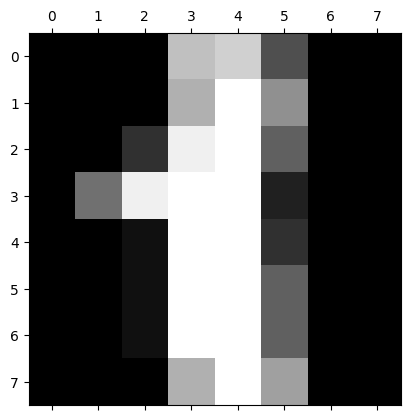

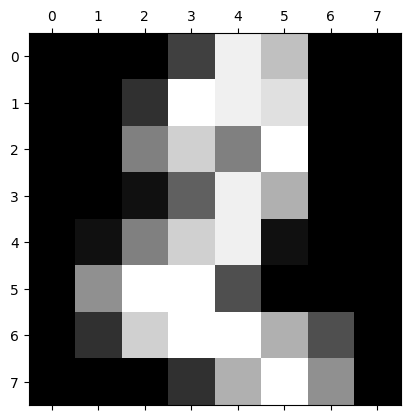

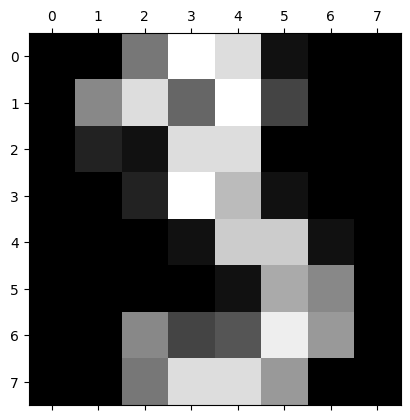

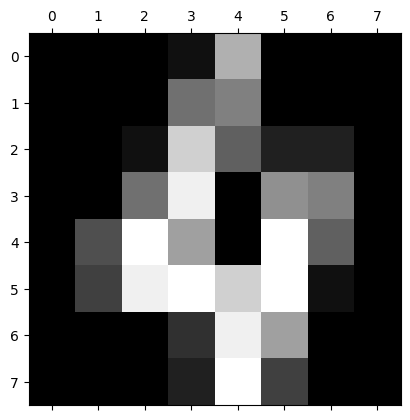

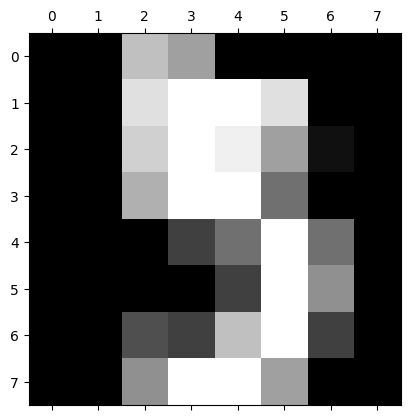

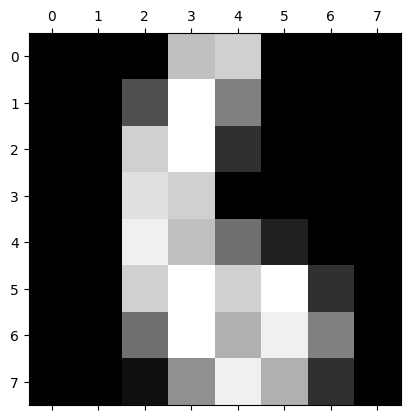

In [65]:
plt.gray()
for i in range(7):
  plt.matshow(digits.images[i])

In [66]:
digits.target[0:7]

array([0, 1, 2, 3, 4, 5, 6])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size = 0.2 )

In [70]:
len(X_train)

1437

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [76]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
model.score(X_test, y_test)

0.9638888888888889

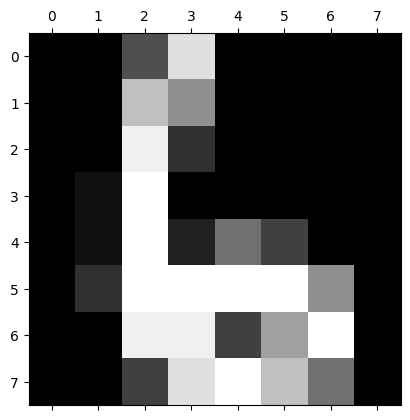

In [80]:
plt.matshow(digits.images[67])

In [81]:
digits.target[67]

6

In [82]:
model.predict([digits.data[67]])

array([6])

In [84]:
model.predict(digits.data[0:7])

array([0, 1, 2, 3, 4, 5, 6])

In [87]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  2, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  0,  0],
       [ 0,  1,  1,  0,  0,  3,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 37]])

Text(95.72222222222221, 0.5, 'Truth')

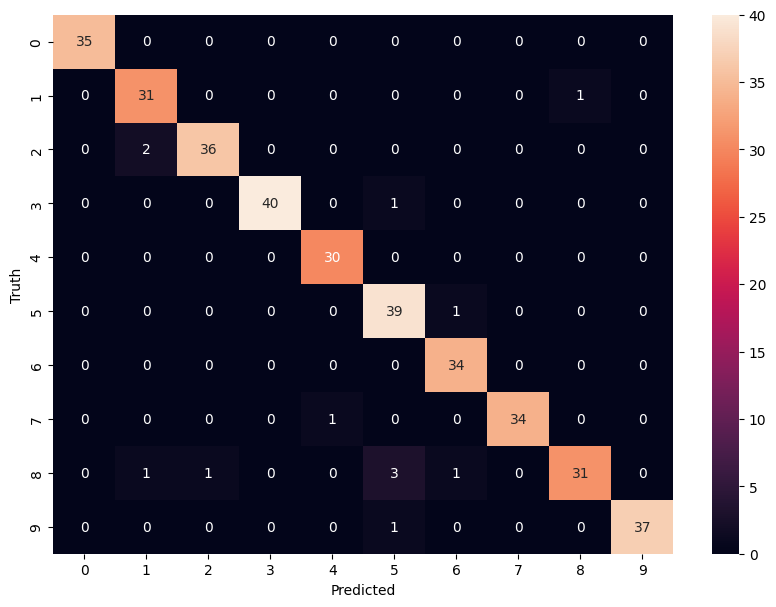

In [88]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Classification using decision tree

In [99]:
import pandas as pd
df = pd.read_csv('sample.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [100]:
inputs = df.drop('salary_more_then_100k', axis = 'columns')
target= df['salary_more_then_100k']

In [101]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [102]:
from sklearn.preprocessing import LabelEncoder


In [104]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [105]:
#creation of new encoded columns
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])
inputs.head()


,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [106]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis = 'columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [107]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target,test_size = 0.2 )

In [117]:
y_train

,salary_more_then_100k
4,0
15,1
13,1
7,0
2,1
0,0
3,1
12,1
8,0
1,0


In [113]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [114]:
model.score(X_test, y_test)

0.5

In [118]:
model.predict([[2,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

#SVM

In [121]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [122]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [123]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [125]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [126]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [127]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [128]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [129]:
import matplotlib.pyplot as plt


In [131]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [132]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


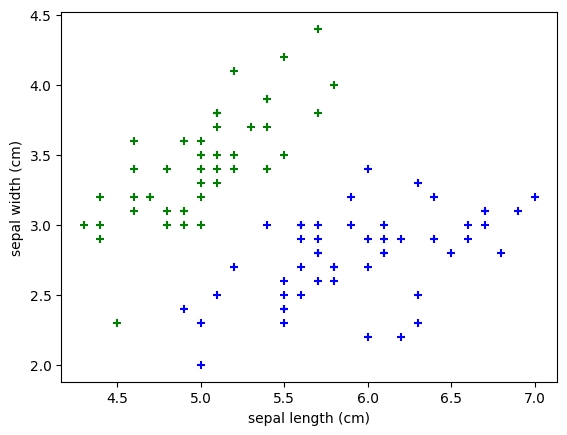

In [138]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='+')

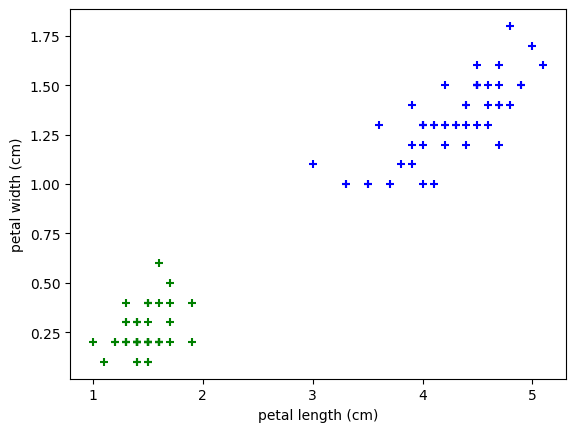

In [139]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='+')

In [140]:
from sklearn.model_selection import train_test_split

In [145]:
X = df.drop(['target', 'flower_name'], axis = 'columns')


In [152]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [147]:
y = df.target

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [149]:
from sklearn.svm import SVC

In [150]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [151]:
model.score(X_test, y_test)

0.9666666666666667

#Random Forest

In [155]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [154]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

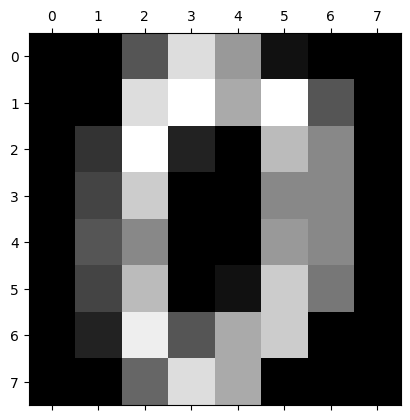

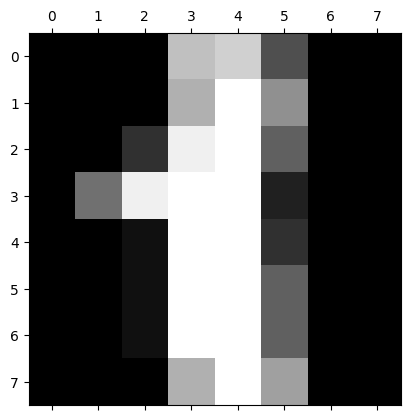

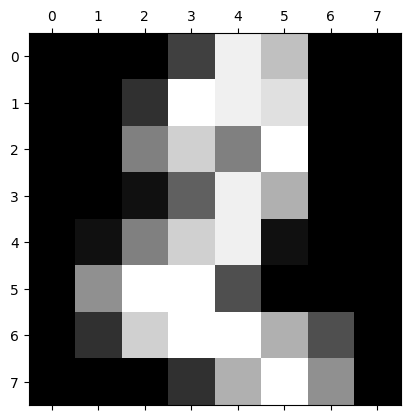

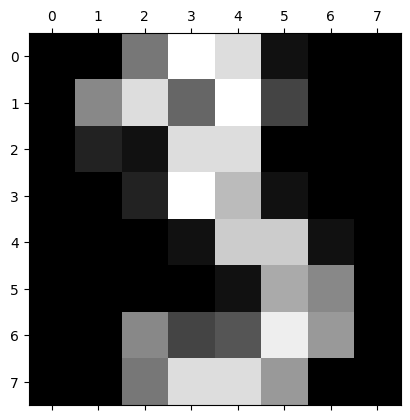

In [157]:
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [159]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [161]:
df.size

115008

In [162]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis = 'columns'), digits.target, test_size = 0.2)

In [172]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [173]:
model.score(X_test, y_test)

0.9861111111111112

In [175]:
y_predicted = mmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 31]])

Text(95.72222222222221, 0.5, 'Truth')

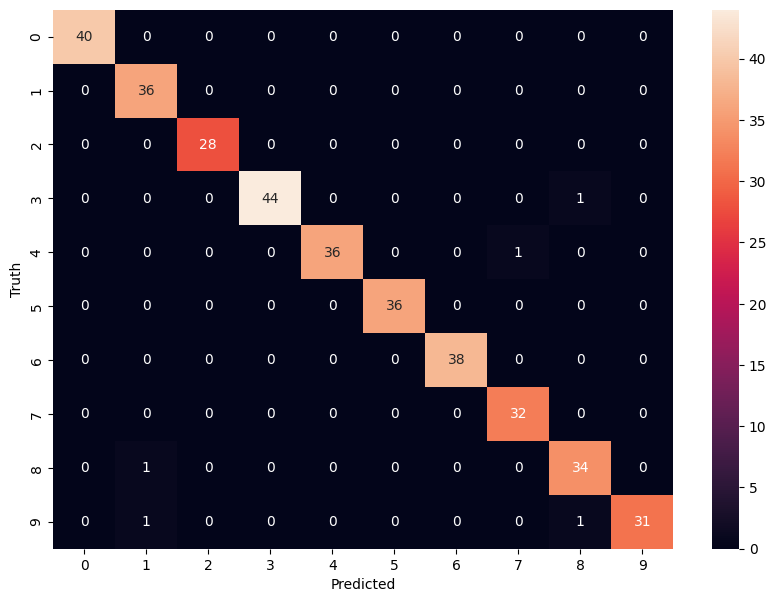

In [176]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#K Flod Validation

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

In [180]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9629629629629629

In [182]:
svm =SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9833333333333333

In [183]:
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9703703703703703

In [185]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [186]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [195]:
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [188]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.9833333333333333

In [189]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 3)

In [198]:
scores_l = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(digits.data):
  X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
  scores_l.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test))
  scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
  scores_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [199]:
scores_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [200]:
from sklearn.model_selection import cross_val_score